### ReLU model

##### Imports

In [10]:
#from torch import empty as e
from torch import empty
import torch
#import torch.empty
import math
import matplotlib.pyplot as plt
torch.set_grad_enabled(False)

##### Test and Training Set by Marijn

In [11]:
def in_circle(p1, center, radius):
    d = math.sqrt((p1[0]-center[0])**2 + (p1[1]-center[1])**2)
    return d<=r

True


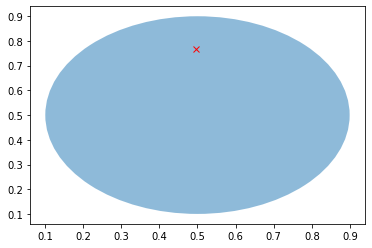

In [12]:
# test my function :) 
point = torch.empty(2).uniform_()
fig, ax = plt.subplots()
r = 1/(math.sqrt(2*math.pi))

print(in_circle(point, (0.5, 0.5), r))
circle1 = plt.Circle((0.5, 0.5), 1/(math.sqrt(2*math.pi)), alpha = 0.5)
ax.add_patch(circle1)
ax.plot(point[0], point[1], 'x',color = 'r')

In [13]:
N = 1000
center = (0.5, 0.5)
r = 1/(math.sqrt(2*math.pi))

train_set = torch.empty(N, 2).uniform_()

#0-1 labels
train_labels = torch.empty(N)

for i in range(len(train_set)):
    train_labels[i] = in_circle(train_set[i], center, r)
    
train_set, train_labels[:10]

(tensor([[0.0885, 0.1320],
         [0.3074, 0.6341],
         [0.4901, 0.8964],
         ...,
         [0.5335, 0.5196],
         [0.3481, 0.8767],
         [0.7773, 0.5896]]),
 tensor([0., 1., 1., 1., 1., 0., 1., 1., 0., 0.]))

##### Module

In [19]:
class Module(object):
    '''
    If a tuple is used it has to be starred:
    tup = empty(2, 2).normal_(), empty(1, 2).normal_()
    m = Module()
    m.forward(*tup) 
    m.forward(empty(2, 2).normal_(), empty(1, 2).normal_()) # is also ok
    '''
    def forward(self, *input):
        raise NotImplementedError

    def backward(self, *gradwrtoutput):
        raise NotImplementedError

    def param(self):
        return []


class ReLU(Module):
    
    def __init__(self):
        self.input = None
    
    def relu(self, x):
        z = empty(x.size()).fill_(0)
        relu = x.maximum(z)
        print("your x", x, "your z", z, "your relu", relu)
        return relu
    
    def d_relu(self, x):
        c = x.detach().clone()
        d_relu = x.apply_(lambda x: 1 if x > 0 else 0)
        print("your x", c, "your d_relu", d_relu)
        return d_relu
        
    def forward (self, *input):
        self.input = input

        return tuple([self.relu(tensor) for tensor in input])
        
    def backward (self, *gradwrtoutput):     
        return tuple([gradwrtoutput[i] * self.d_relu(self.input[i]) for i in range(len(self.input))])
    
class ParamReLU(Module):
    
    def __init__(self, par):
        self.input = None
        self.par = par
    
    def relu(self, x):
        relu = x.apply_(lambda x: x if x>0 else self.par*x)
        return relu
    
    def d_relu(self, x):
        c = x.detach().clone()
        d_relu = x.apply_(lambda x: 1 if x > 0 else self.par)
        print("your x", c, "your d_relu", d_relu)
        return d_relu
        
    def forward (self, *input):
        self.input = input

        return tuple([self.relu(tensor) for tensor in input])
        
    def backward (self, *gradwrtoutput):     
        return tuple([gradwrtoutput[i] * self.d_relu(self.input[i]) for i in range(len(self.input))])
    
    def param(self):
        return [self.par]

##### First Example

In [20]:
torch.manual_seed(0)

temp = torch.empty(2, 2).fill_(-3), torch.tensor((-2, 2))
temp_error = torch.empty(1).fill_(2e-4), torch.empty(1).fill_(0)
#m = ReLU()
m = ParamReLU(0.1)

x = m.forward(*temp)
print("forward: {}\n".format(x))


x = m.backward(*temp_error)
print("backward: {}\n".format(x))
print(m.param())

forward: (tensor([[-0.3000, -0.3000],
        [-0.3000, -0.3000]]), tensor([0, 2]))

your x tensor([[-0.3000, -0.3000],
        [-0.3000, -0.3000]]) your d_relu tensor([[0.1000, 0.1000],
        [0.1000, 0.1000]])
your x tensor([0, 2]) your d_relu tensor([0, 1])
backward: (tensor([[2.0000e-05, 2.0000e-05],
        [2.0000e-05, 2.0000e-05]]), tensor([0., 0.]))

[0.1]
